In [1]:
import pandas as pd
movies = pd.read_csv('fandango_score_comparison.csv')

movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


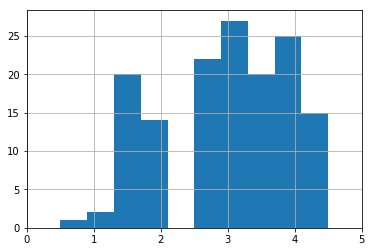

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.set_xlim(0,5)
movies['Metacritic_norm_round'].hist(ax=ax, bins=10)

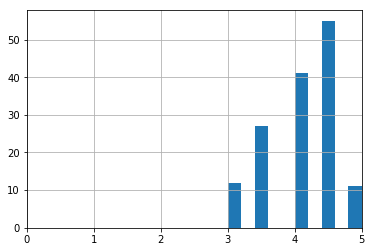

In [3]:
fig, ax = plt.subplots()
ax.set_xlim(0,5)
movies['Fandango_Stars'].hist(ax=ax, bins=10)

Fandango rating is higher in comparison to Metacritic rating. Actually Fandango starts with a 3 star rating there is zero rating for 1 and 2 stars.

In [4]:
fandango_mean = movies['Fandango_Stars'].mean()
print(fandango_mean)
metacritic_mean = movies['Metacritic_norm_round'].mean()
print(metacritic_mean)

4.089041095890411
2.9726027397260273


In [5]:
import numpy as np
fandango_median = np.median(movies['Fandango_Stars'])
print(fandango_median)
metacritic_median = np.median(movies['Metacritic_norm_round'])
print(metacritic_median)

4.0
3.0


In [6]:
fandango_std = movies['Fandango_Stars'].std()
print(fandango_std)
metacritic_std = movies['Metacritic_norm_round'].std()
print(metacritic_std)

0.5403859779787333
0.9909605613743364


### Scoring
How metacritic scores
http://www.metacritic.com/about-metascores
How Fandango scores is unclear.

### Data: median, mean, std
Well fandando rates movie on higher end it is quite clear from the hist. Thus the median and mean follow that anology here. As the hist for Fandango is just in 3-5 it is obvious that the std is smaller.

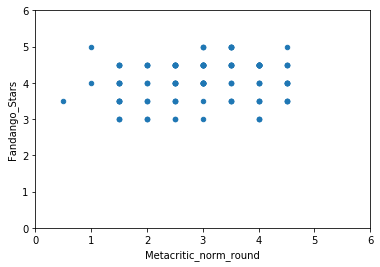

In [7]:
fig, ax = plt.subplots()
ax.set_xlim(0,6)
ax.set_ylim(0,6)
movies.plot.scatter(x='Metacritic_norm_round', y='Fandango_Stars', ax=ax)

In [8]:
movies['fm_diff'] = movies['Fandango_Stars'] - movies['Metacritic_norm_round']

In [9]:
movies['fm_diff'] = abs(movies['fm_diff'])

In [10]:
movies.sort_values('fm_diff', ascending=False, inplace=True)

In [11]:
movies[['FILM','fm_diff','Fandango_Stars','Metacritic_norm_round', 'IMDB_norm']].head(5)

,FILM,fm_diff,Fandango_Stars,Metacritic_norm_round,IMDB_norm
3,Do You Believe? (2015),4.0,5.0,1.0,2.7
85,Little Boy (2015),3.0,4.5,1.5,3.7
47,Annie (2014),3.0,4.5,1.5,2.6
19,Pixels (2015),3.0,4.5,1.5,2.8
134,The Longest Ride (2015),3.0,4.5,1.5,3.6


In [12]:
from scipy.stats import pearsonr
r, p = pearsonr(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
r

0.17844919073895918

### Correlation
Having a low correlations shows that there is hardly any correlation in data between Fandango and Metacritic.

In [13]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies['Fandango_Stars'])
slope, intercept

(0.097311077973928559, 3.799773918899418)

In [14]:
pred_3 = (3 * slope) + intercept
pred_3

4.0917071528212032

In [15]:
pred_1 = (5 * slope) + intercept
pred_1

4.2863293087690604

#### LinearRegression
This clearly shows that Fandango ratings are way much higher than Metacritic ratings.

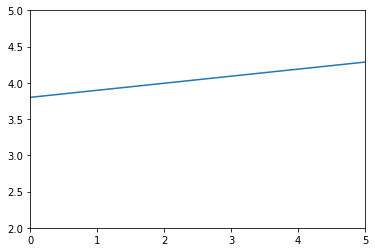

In [16]:
def predict_fandango(rating_metacritic):
    return (rating_metacritic * slope) + intercept

x = [0,1,2,3,4,5]
y = [predict_fandango(r) for r in x]
plt.xlim(0,5)
plt.ylim(2,5)
plt.plot(x, y)
plt.show()

Other stuff
* Explore the other rating services, IMDB and RottenTomatoes.
 * See how they differ from each other.
 *See how they differ from Fandango.
* See how user scores differ from critic scores.
* Acquire more recent review data, and see if the pattern of Fandango inflating reviews persists.
* Dig more into why certain movies had their scores inflated more than others.